

This notebook analyzes comments by performing text preprocessing, sentiment analysis, and engagement evaluation. It includes:

**1-Data Cleaning**: Removing stopwords, special characters, and unnecessary whitespace.

**2-Sentiment Analysis:** Categorizing comments as positive, negative, or neutral using NLP techniques.

**3-Engagement Metrics:** Evaluating comment impact based on likes, replies, and shares.



# Loading data

In [ ]:
import json

In [ ]:
# Load JSON file
with open("tiktok_data_trending_videos_with_comments.json", "r", encoding="utf-8") as file:
    data = json.load(file)


In [ ]:
print("Total videos with comments:", len(data))

Total videos with comments: 191


In [ ]:
# Extract necessary fields
video_data = []

for video in data:
    video_id = video.get("id", None)  # Get video ID
    comment_count = video.get("statsV2", {}).get("commentCount", 0)  # Get comment count

    comments = video.get("comments", [])  # Get comments list

    for comment in comments:
        if isinstance(comment, dict):  # Ensure it's a dictionary
            comment_text = comment.get("text", "").strip()  # Get comment text
            comment_language = comment.get("comment_language", "unknown")  # Get detected language

            if comment_text:  # Avoid empty comments
                video_data.append({
                    "video_id": video_id,
                    "comment": comment_text,
                    "comment_count": comment_count,
                    "comment_language": comment_language  # Correctly extracted
                })


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(video_data)

In [ ]:
df.shape

(7508, 4)

In [ ]:
print(df.head())

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

  comment_count comment_language  
0          3247               ar  
1          3247               ar  
2          3247               ar  
3          3247               ar  
4          3247               ar  


# Preprocess comments

In [ ]:
!pip install deep-translator nltk spacy arabic-reshaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install -U spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fr-core-news-sm 3.7.0 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.8.4 which is incompatible.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7

In [ ]:
import re
import string
from deep_translator import GoogleTranslator
import nltk
import spacy
import arabic_reshaper

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords_en = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Translate Non-English Comments to English
def translate_to_english(text, lang):
    if lang == "en":
        return text  # Already in English
    try:
        return GoogleTranslator(source=lang, target="en").translate(text)
    except:
        return text  # If translation fails, keep original text

In [ ]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def clean_translated_text(text):
    """
    Cleans English text by removing URLs, mentions, punctuation, and stopwords.
    """
    if not isinstance(text, str) or not text.strip():
        return ""

    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#\w+', '', text)  # Remove mentions & hashtags

     # Remove punctuation except exlamation mark
    punctuation_to_remove = string.punctuation.replace("!", "")
    text = text.translate(str.maketrans('', '', punctuation_to_remove))

    # Tokenization & stopword removal using SpaCy
    doc = nlp(text)
    cleaned_text = " ".join([token.text for token in doc if token.text not in stopwords_en])

    # Remove extra whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [ ]:
df['translated_comment'] = df.apply(lambda row: translate_to_english(row['comment'], row['comment_language']), axis=1)

In [ ]:
print(df.head(5))

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

  comment_count comment_language  \
0          3247               ar   
1          3247               ar   
2          3247               ar   
3          3247               ar   
4          3247               ar   

                                  translated_comment  
0  Girls, how do you move your waist? I only know...  
1                                Ok, I will exercise  
2                         May God not let him see it  
3                     This wife who opens the soul 💔  
4                                            

In [ ]:
df["cleaned_comment"] = df["translated_comment"].apply(clean_translated_text)

In [ ]:
df.to_csv("comments_cleaned.csv", index=False)

In [ ]:
print(df.head(5))

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

  comment_count comment_language  \
0          3247               ar   
1          3247               ar   
2          3247               ar   
3          3247               ar   
4          3247               ar   

                                  translated_comment  \
0  Girls, how do you move your waist? I only know...   
1                                Ok, I will exercise   
2                         May God not let him see it   
3                     This wife who opens the soul 💔   
4                                       

# Sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
# Sentiment analysis using VADER
df['sentiment'] = df['cleaned_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
print(df.head(5))

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

  comment_count comment_language  \
0          3247               ar   
1          3247               ar   
2          3247               ar   
3          3247               ar   
4          3247               ar   

                                  translated_comment  \
0  Girls, how do you move your waist? I only know...   
1                                Ok, I will exercise   
2                         May God not let him see it   
3                     This wife who opens the soul 💔   
4                                       

In [ ]:
print("Sentiment Distribution:")
print(df['sentiment'].describe())

Sentiment Distribution:
count    7508.000000
mean        0.142997
std         0.324581
min        -0.937100
25%         0.000000
50%         0.000000
75%         0.401900
max         0.999600
Name: sentiment, dtype: float64


## 2éme modele

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Load pre-trained model for sentiment analysis
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
def transformer_sentiment(text):
    try:
        # Ensure text is a string and truncate long comments
        text = str(text)[:500]  # Truncate to 500 characters before tokenization

        # Tokenize input text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

        # Run model and get outputs
        with torch.no_grad():  # Disable gradient calculations for efficiency
            outputs = model(**inputs)

        # Apply softmax to get sentiment scores
        scores = softmax(outputs.logits.numpy())[0]

        # Compute sentiment score (Positive - Negative)
        return scores[2] - scores[0]  # Positive - Negative sentiment score

    except Exception as e:
        print(f"Error processing text: {text[:50]}... | Error: {e}")
        return 0  # Neutral score if there's an issue

# Apply the function to your DataFrame
df['sentiment_b'] = df['cleaned_comment'].apply(transformer_sentiment)

In [ ]:
print(df.head(5))

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

  comment_count comment_language  \
0          3247               ar   
1          3247               ar   
2          3247               ar   
3          3247               ar   
4          3247               ar   

                                  translated_comment  \
0  Girls, how do you move your waist? I only know...   
1                                Ok, I will exercise   
2                         May God not let him see it   
3                     This wife who opens the soul 💔   
4                                       

In [ ]:
print("Sentiment Distribution:")
print(df['sentiment_b'].describe())

Sentiment Distribution:
count    7508.000000
mean        0.148810
std         0.464085
min        -0.975287
25%        -0.101898
50%         0.050231
75%         0.494151
max         0.990286
Name: sentiment_b, dtype: float64


In [ ]:
df.to_csv("comments_with_sentiments.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("comments_with_sentiments.csv")

In [ ]:
df

,video_id,comment,comment_count,comment_language,translated_comment,cleaned_comment,sentiment,sentiment_b
0,7446111299458698498,بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...,3247,ar,"Girls, how do you move your waist? I only know...",girls move waist know move one side n’t know m...,0.0000,-0.133445
1,7446111299458698498,اوكي بقوم اتمرن,3247,ar,"Ok, I will exercise",ok exercise,0.2960,0.079936
2,7446111299458698498,يا رب ما يشوفها,3247,ar,May God not let him see it,may god let see,0.2732,0.301374
3,7446111299458698498,هذه الزوجه اللي تفتح النفس 💔,3247,ar,This wife who opens the soul 💔,wife opens soul 💔,0.0000,-0.502844
4,7446111299458698498,اويليييي🫦🫦🫦,3247,ar,Oh my,oh,0.0000,-0.108478
...,...,...,...,...,...,...,...,...
7503,7464338768489614614,expliquer svp,2385,fr,explain please,explain please,0.3182,-0.096081
7504,7464338768489614614,"L’être humain me dégoûte c terrible, t’es parf...",2385,fr,"Human beings disgust me, it's terrible, you're...",human beings disgust terrible perfect nt listen,-0.5106,-0.975287
7505,7464338768489614614,juste c quoi la série ou la film ??,2385,fr,just what is the series or the movie??,series movie,0.0000,0.064789
7506,7464338768489614614,Moi jpp les fenêtres son en hauteur et chuis t...,2385,fr,I like the windows are high up and I'm very sm...,like windows high small okay,0.5267,0.563964


In [ ]:
# Extract necessary fields
video_data = []

for video in data:
    video_id = video.get("id", None)  # Get video ID
    comment_count = video.get("statsV2", {}).get("commentCount", 0)  # Get comment count
    comments = video.get("comments", [])  # Get comments list

    for comment in comments:
        if isinstance(comment, dict):  # Ensure it's a dictionary
            comment_text = comment.get("text", "").strip()  # Get comment text
            comment_language = comment.get("comment_language", "unknown")  # Get detected language
            digg_count = comment.get("digg_count", 0)  # Likes on the comment
            reply_count = comment.get("reply_comment_total", 0)  # Replies on the comment
            timestamp = comment.get("create_time", 0)  # Timestamp of the comment

            if comment_text:  # Avoid empty comments
                video_data.append({
                    "video_id": video_id,
                    "comment": comment_text,
                    "comment_count": comment_count,
                    "comment_language": comment_language,  # Correctly extracted
                    "likes": digg_count,
                    "replies": reply_count,
                    "timestamp": pd.to_datetime(timestamp, unit="s")  # Convert to datetime
                })

In [ ]:
# Create DataFrame
df1 = pd.DataFrame(video_data)


In [ ]:
df1

,video_id,comment,comment_count,comment_language,likes,replies,timestamp
0,7446111299458698498,بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...,3247,ar,193,20,2024-12-11 10:52:22
1,7446111299458698498,اوكي بقوم اتمرن,3247,ar,1309,10,2024-12-09 05:35:55
2,7446111299458698498,يا رب ما يشوفها,3247,ar,265,17,2024-12-09 12:32:10
3,7446111299458698498,هذه الزوجه اللي تفتح النفس 💔,3247,ar,40,18,2024-12-12 09:53:46
4,7446111299458698498,اويليييي🫦🫦🫦,3247,ar,17,4,2025-01-03 23:52:47
...,...,...,...,...,...,...,...
7503,7464338768489614614,expliquer svp,2385,fr,17,4,2025-01-27 17:16:19
7504,7464338768489614614,"L’être humain me dégoûte c terrible, t’es parf...",2385,fr,5,6,2025-01-28 01:15:48
7505,7464338768489614614,juste c quoi la série ou la film ??,2385,fr,5,6,2025-01-27 16:10:19
7506,7464338768489614614,Moi jpp les fenêtres son en hauteur et chuis t...,2385,fr,42,1,2025-01-27 06:55:30


In [ ]:
df= df.join(df1, how="inner", lsuffix="_df", rsuffix="_df1")

In [ ]:
print(df.head(5))

              video_id                                            comment  \
0  7446111299458698498  بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...   
1  7446111299458698498                                    اوكي بقوم اتمرن   
2  7446111299458698498                                    يا رب ما يشوفها   
3  7446111299458698498                       هذه الزوجه اللي تفتح النفس 💔   
4  7446111299458698498                                        اويليييي🫦🫦🫦   

   comment_count comment_language  \
0           3247               ar   
1           3247               ar   
2           3247               ar   
3           3247               ar   
4           3247               ar   

                                  translated_comment  \
0  Girls, how do you move your waist? I only know...   
1                                Ok, I will exercise   
2                         May God not let him see it   
3                     This wife who opens the soul 💔   
4                                 

In [ ]:
df["date"] = df["timestamp"].dt.date  # Convert timestamp to date

In [ ]:
df

,video_id,comment,comment_count,comment_language,translated_comment,cleaned_comment,sentiment,sentiment_b,likes,replies,timestamp,date
0,7446111299458698498,بنات كيف تحركون الخصر هيك انا معرف احرك الا جه...,3247,ar,"Girls, how do you move your waist? I only know...",girls move waist know move one side n’t know m...,0.0000,-0.133445,193,20,2024-12-11 10:52:22,2024-12-11
1,7446111299458698498,اوكي بقوم اتمرن,3247,ar,"Ok, I will exercise",ok exercise,0.2960,0.079936,1309,10,2024-12-09 05:35:55,2024-12-09
2,7446111299458698498,يا رب ما يشوفها,3247,ar,May God not let him see it,may god let see,0.2732,0.301374,265,17,2024-12-09 12:32:10,2024-12-09
3,7446111299458698498,هذه الزوجه اللي تفتح النفس 💔,3247,ar,This wife who opens the soul 💔,wife opens soul 💔,0.0000,-0.502844,40,18,2024-12-12 09:53:46,2024-12-12
4,7446111299458698498,اويليييي🫦🫦🫦,3247,ar,Oh my,oh,0.0000,-0.108478,17,4,2025-01-03 23:52:47,2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
7503,7464338768489614614,expliquer svp,2385,fr,explain please,explain please,0.3182,-0.096081,17,4,2025-01-27 17:16:19,2025-01-27
7504,7464338768489614614,"L’être humain me dégoûte c terrible, t’es parf...",2385,fr,"Human beings disgust me, it's terrible, you're...",human beings disgust terrible perfect nt listen,-0.5106,-0.975287,5,6,2025-01-28 01:15:48,2025-01-28
7505,7464338768489614614,juste c quoi la série ou la film ??,2385,fr,just what is the series or the movie??,series movie,0.0000,0.064789,5,6,2025-01-27 16:10:19,2025-01-27
7506,7464338768489614614,Moi jpp les fenêtres son en hauteur et chuis t...,2385,fr,I like the windows are high up and I'm very sm...,like windows high small okay,0.5267,0.563964,42,1,2025-01-27 06:55:30,2025-01-27


In [ ]:
df.to_csv("comments_with_sentiments.csv", index=False)

# Visualizing Sentiment Insights

##  Sentiment Trend Over Time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-47-c2362a28ec48>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="date", y="sentiment_b", data=df, estimator="mean", ci=None, marker="o")


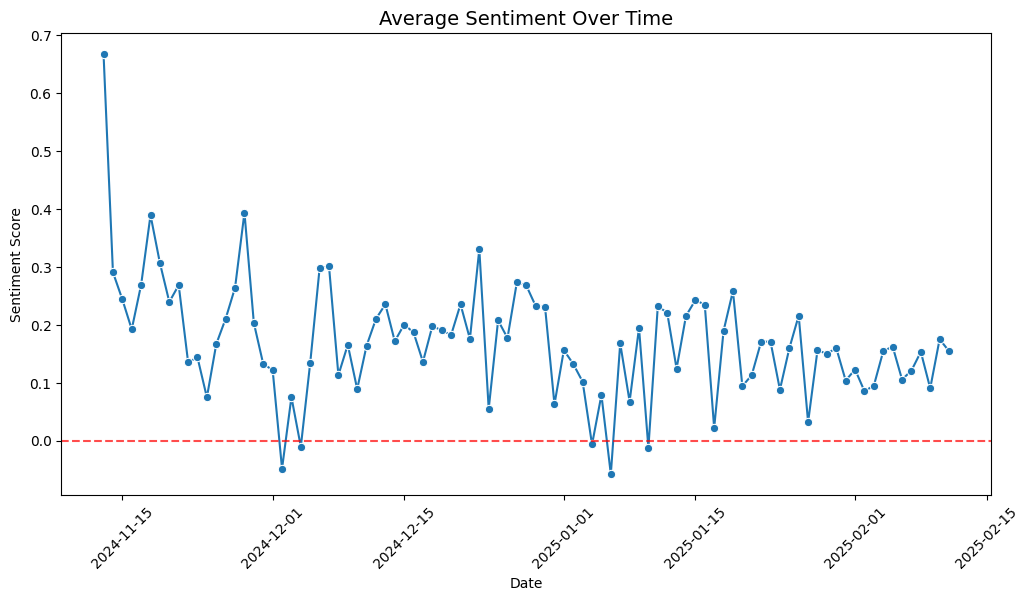

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="sentiment_b", data=df, estimator="mean", ci=None, marker="o")
plt.axhline(0, linestyle="dashed", color="red", alpha=0.7)
plt.title("Average Sentiment Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()

## Sentiment vs. Engagement

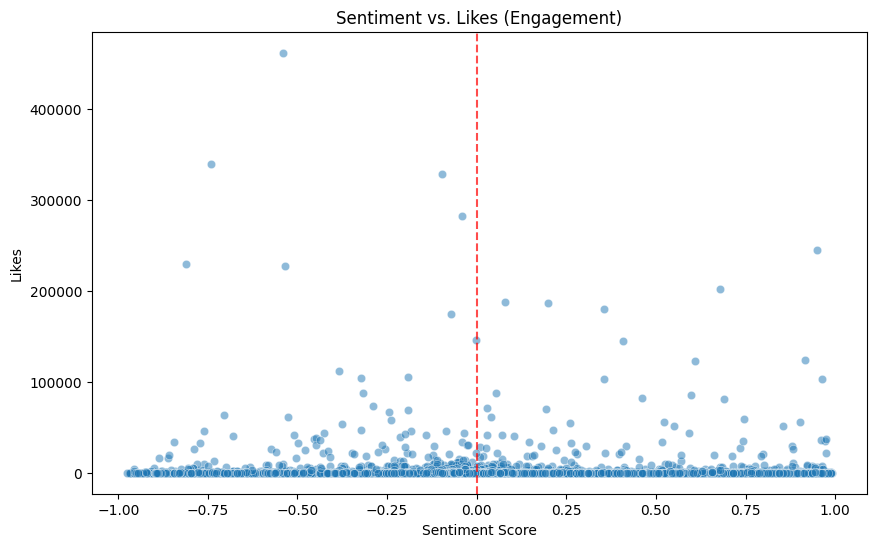

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["sentiment_b"], y=df["likes"], alpha=0.5)
plt.axvline(0, linestyle="dashed", color="red", alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Likes")
plt.title("Sentiment vs. Likes (Engagement)")
plt.show()

## Trending Words in comments (maybe zeyda)

In [ ]:
from wordcloud import WordCloud

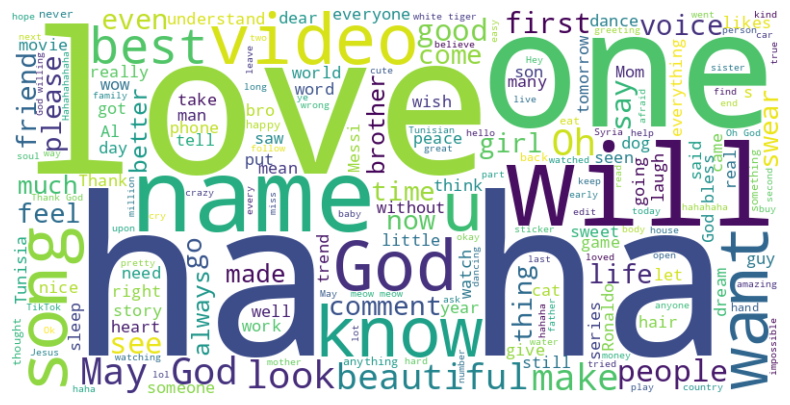

In [ ]:
# Replace None values with empty strings
df["translated_comment"] = df["translated_comment"].fillna("")

# Now generate the word cloud
text = " ".join(df["translated_comment"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## engaging videos

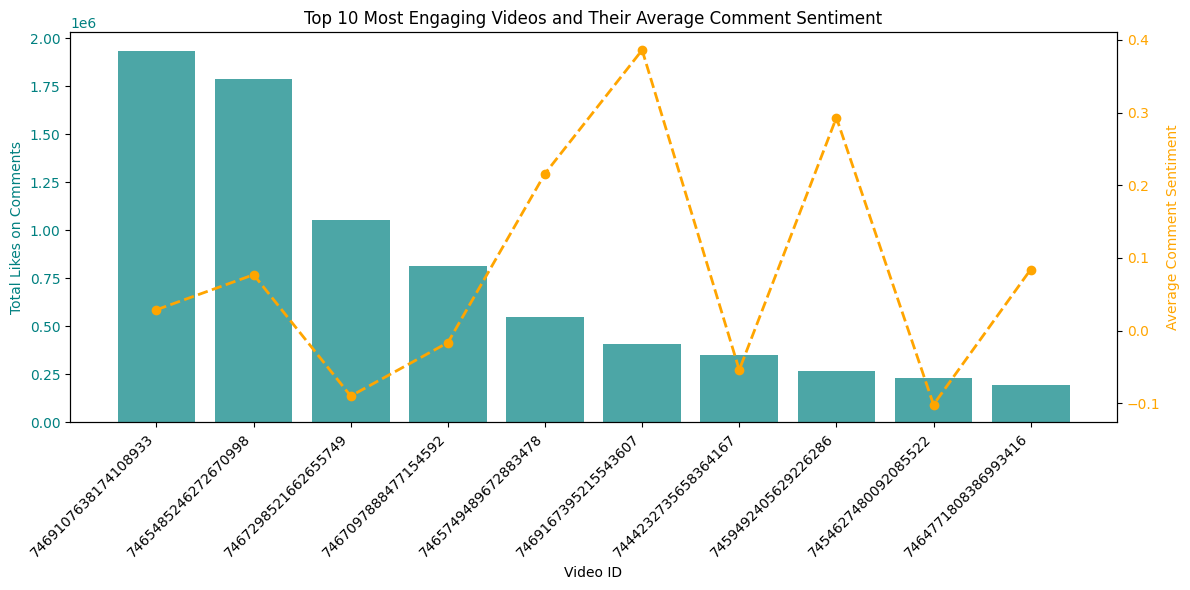

In [ ]:
# Calculate total likes, total replies, and average sentiment for each video
video_stats = df.groupby("video_id").agg({
    "likes": "sum",
    "replies": "sum",
    "sentiment_b": "mean"  # Calculate average sentiment
}).sort_values(by="likes", ascending=False).head(10)

# Convert video_id to string for proper labeling
video_stats.index = video_stats.index.astype(str)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total likes
ax1.bar(video_stats.index, video_stats["likes"], color="teal", alpha=0.7)
ax1.set_xlabel("Video ID")
ax1.set_ylabel("Total Likes on Comments", color="teal")
ax1.tick_params(axis="y", labelcolor="teal")
ax1.set_xticks(range(len(video_stats.index)))  # Set tick positions
ax1.set_xticklabels(video_stats.index, rotation=45, ha="right")  # Rotate x-axis labels

# Create secondary axis for sentiment
ax2 = ax1.twinx()
ax2.plot(video_stats.index, video_stats["sentiment_b"], color="orange", marker="o", linestyle="--", linewidth=2)
ax2.set_ylabel("Average Comment Sentiment", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title("Top 10 Most Engaging Videos and Their Average Comment Sentiment")
plt.tight_layout()
plt.show()
